<a href="https://colab.research.google.com/github/AgustinBiasca/Linear-Regression/blob/main/Autodataset%20LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install ISLP

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import(ModelSpec as MS,
                 summarize,
                 poly)

In [4]:
auto = load_data('Auto')
df = pd.DataFrame(auto)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [5]:
df.shape

(392, 8)

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In this case we have the dataset ‘auto’, which contains 392 car types, with their mpg (miles per gallon), cylinders, displacement, horsepower, weight, acceleration, year, origin

Let's take mpg as a response variable, seeing which variables affect it and how we can predict how much a car will consume with a given number of these predictors.

Before putting all the independent variables into the problem, I am going to use one particular predictor, horsepower, just to see how this affects gasoline consumption


In [7]:
X = MS(['horsepower']).fit_transform(df)
y= df['mpg']

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


At first glance, we see a negative relationship between horsepower and mpg. This indicates that if we increase this variable, the response will decrease.

The p-value is close to 0, so we reject the null hypothesis, and confirm the relationship between both variables.

In [8]:
print(f'The R squared is : {results.rsquared}')
print(f'The RSE is : {results.scale}')

The R squeard is : 0.6059482578894348
The RSE is : 24.066450953672874


We observe a large value of R^2, however, the RSE is relatively high, let's focus on this point.

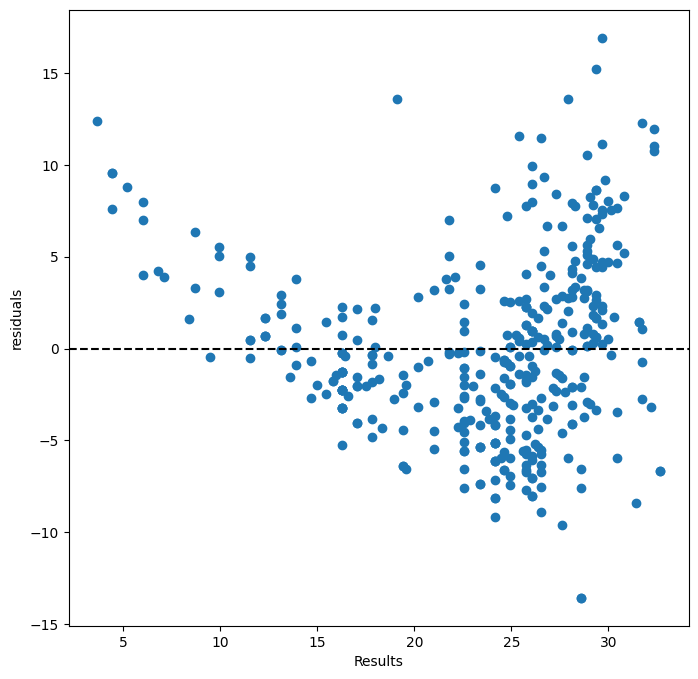

In [9]:
ax = subplots(figsize= (8, 8))[1]

ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Results')
ax.set_ylabel('residuals')
ax.axhline(0, c='k', ls = '--')
plt.show()

If we look closely at the graph, we see some outliers, which are probably negatively affecting our model. However, the most prominent is a U-type shape or a kind of curve formed by the blue dots, and a certain pattern in the residuals. It can be seen that they are not completely randomly distributed.

The latter is a clear example of nonlinearity. Let's try fitting this model.

In [10]:
X = MS([poly('horsepower', degree= 2)]).fit_transform(df)

model2 = sm.OLS(y, X)
results2= model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.130,0.0
"poly(horsepower, degree=2)[0]",-120.1377,4.374,-27.467,0.0
"poly(horsepower, degree=2)[1]",44.0895,4.374,10.080,0.0


In [11]:
print(f'The R squared is : {results.rsquared}')
print(f'The RSE is : {results.scale}')

print('--------------------------------------------------')

print(f'The R squared is : {results2.rsquared}')
print(f'The RSE is : {results2.scale}')

The R squeard is : 0.6059482578894348
The RSE is : 24.066450953672874
--------------------------------------------------
The R squeard is : 0.6875590305127516
The RSE is : 19.131181007161825


The improvement is incredible, 8 points in our R-squared and we managed to lower that CSR value by simply adding another variable to our model.

We could keep increasing degrees by simply replacing in the ‘degree’ line.

whenever we increase the degrees, our results will improve, but we will lose interpretability in the results.

And above all, most problematic, our model will start to memorize and overestimate data when we want to predict or introduce new values.

For me a degree of 2 is enough

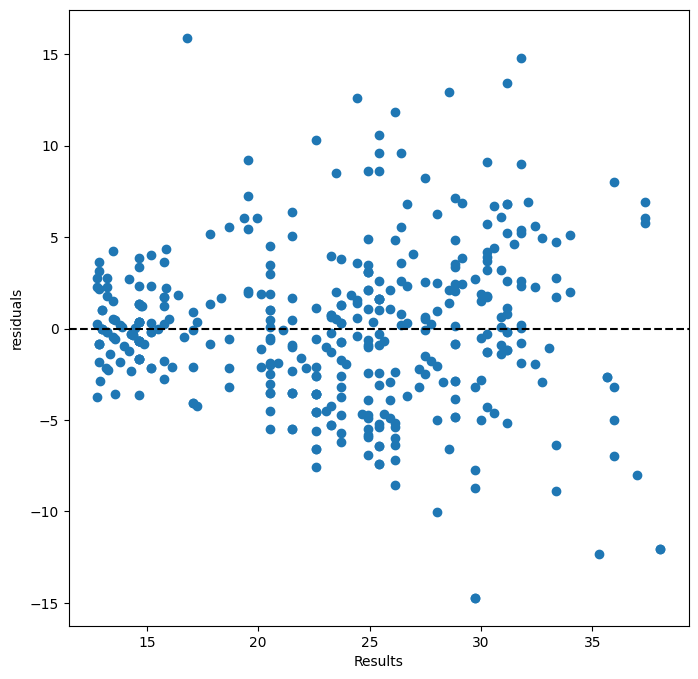

In [12]:
ax = subplots(figsize= (8, 8))[1]

ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Results')
ax.set_ylabel('residuals')
ax.axhline(0, c='k', ls = '--')
plt.show()

Big change, no pattern is observed in the data, and the distribution seems to be random around zero. We still have those outliers, but they don't seem to be such a problem when fitting the model.

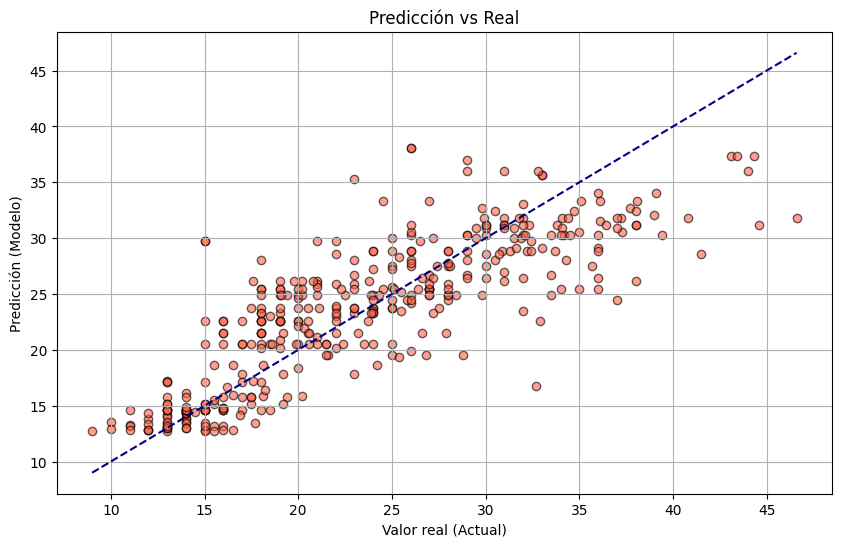

In [13]:

fig= plt.figure(figsize=(10,6))

plt.scatter(y, results2.predict(), alpha=0.6, color='tomato', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='navy', linestyle='--')
plt.xlabel("Valor real (Actual)")
plt.ylabel("Predicción (Modelo)")
plt.title("Predicción vs Real")
plt.grid(True)
plt.show()

Dashed blue line: is the ideal reference line where the prediction would be perfect (i.e. where prediction = actual value).

If the points are aligned near the blue line, it means that the model is predicting well.


Once we have analyzed how a particular predictor behaves, let's use the whole dataset and see if we can draw any extra conclusions.

In [14]:
allvars = df.columns.drop('mpg')
X = MS(allvars).fit_transform(df)
y = df['mpg']

model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


cylinders and displacement can be removed as they have a high p-value.

In [15]:
newvars = df.columns.drop(['mpg', 'cylinders', 'displacement'])

X = MS(newvars).fit_transform(df)

model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,-17.8427,4.592,-3.886,0.000
horsepower,-0.0058,0.013,-0.442,0.659
weight,-0.0057,0.001,-11.329,0.000
acceleration,0.0490,0.098,0.501,0.616
year,0.7405,0.051,14.511,0.000
origin,1.1799,0.262,4.500,0.000


In [16]:
print(f'The r squeard is : {results4.rsquared}')
print(f'The RSE is : {results4.scale}')

The r squeard is : 0.8181753655401003
The RSE is : 11.219895805114424


In [17]:
X = MS([poly('horsepower', degree= 2),
        'weight',
        'acceleration',
        'year',
        'origin']).fit_transform(df)

model5 = sm.OLS(y, X)
results5= model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,-19.1270,3.696,-5.174,0.000
"poly(horsepower, degree=2)[0]",-51.6403,10.193,-5.066,0.000
"poly(horsepower, degree=2)[1]",34.4470,3.502,9.836,0.000
weight,-0.0034,0.001,-6.810,0.000
acceleration,-0.3123,0.095,-3.292,0.001
year,0.7367,0.046,16.127,0.000
origin,1.0847,0.235,4.618,0.000


In [18]:
print(f'The r squeard is : {results4.rsquared}')
print(f'The RSE is : {results4.scale}')

print('-------------------------------------------------')

print(f'The r squeard is : {results5.rsquared}')
print(f'The RSE is : {results5.scale}')

The r squeard is : 0.8181753655401003
The RSE is : 11.219895805114424
-------------------------------------------------
The r squeard is : 0.8546930691848399
The RSE is : 8.989778795176825


In [19]:
anova_lm(results4, results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,386.0,4330.879781,0.0,NaN,NaN,NaN
1,385.0,3461.064836,1.0,869.814945,96.75599,1.622239e-20


With these last two lines of code we see that the quadratic term improves our model. This is clearly seen in the increase of the rsqueard and now with the F-statistic, the latter is a great indication of this improvement.

Adding quadratic variables can lead to the problem of collinearity. Let's use the VIF to see how we are doing.

In [20]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]

vif = pd.DataFrame({'vif': vals},
                   index = X.columns[1:])

vif


,vif
"poly(horsepower, degree=2)[0]",11.556971
"poly(horsepower, degree=2)[1]",1.364195
weight,8.031988
acceleration,2.979163
year,1.231619
origin,1.557288


A VIF close to 1 is ideal and shows that there is no correlation with other variables.

if VIF > 5 or 10. there is multicollinearity.

We see that horsepower has a very high VIF. While weight is also high but not extreme.

In our case, where the model has a high r-squared and a low RSE, it would not be necessary to eliminate one of the variables. Even more so if our objective is to predict. But it must be taken into account.

A less extreme option would be to create a new column, which is a combination of these two.

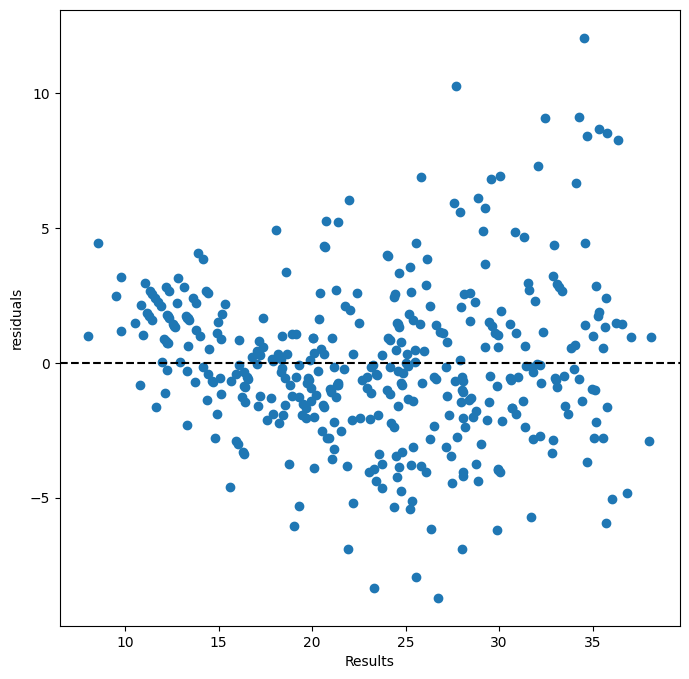

In [21]:
ax = subplots(figsize= (8, 8))[1]

ax.scatter(results5.fittedvalues, results5.resid)
ax.set_xlabel('Results')
ax.set_ylabel('residuals')
ax.axhline(0, c='k', ls = '--')
plt.show()

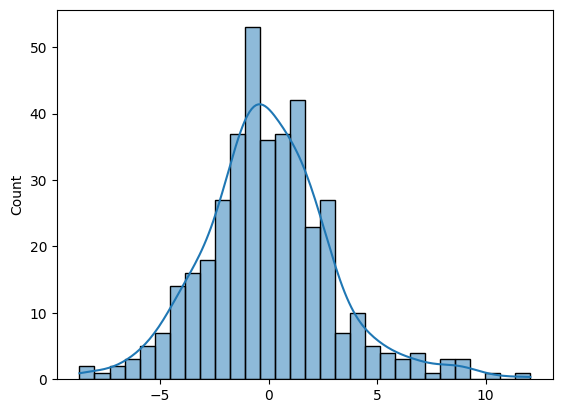

In [31]:
plt.figure()
sns.histplot(results5.resid, kde=True, bins=30)
plt.show()

Ideally the residuals should be around zero. This suggests that the model has no systematic bias: it does not consistently overestimate or underestimate.

You see a bell shape which says that the errors are random.